Importing required python modules
1. pandas and numpy for reading csv files and saving the results
2. matplotlib and seaborn for plotting graphs to visualise and make sense of data
3. np_utils for "one-hot encoding" of labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.utils import np_utils
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Importing data from csv files:
1. train.csv : The training data set, has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
2. test.csv: The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Reading train data using pandas.



In [2]:
data = pd.read_csv("../input/train.csv")
data = data.values
#Taking labels(first column) out of data.
label = data[:,0]

# Drop 'label' column
data = data[:,1:]

print("Data loaded, ready to go!")

Data loaded, ready to go!


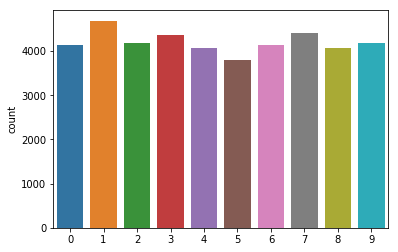

In [3]:
#plot distribution of label values
g = sns.countplot(label)

Diving data and label into two parts: train and validation.
We have a separate test.csv file for testing our model predictions

In [4]:
#splitting data into train and valid
train_data=data[:35000,:]
valid_data=data[35000:,:]

#reshaping to make it in proper input shape for a neural network
train_data = train_data.reshape(train_data.shape[0], 1, 28, 28).astype('float32')
valid_data = valid_data.reshape(valid_data.shape[0], 1, 28, 28).astype('float32')

#normalise data
train_data = train_data / 255
valid_data= valid_data/255

#spliting label into train and valid
train_label = label[:35000]
valid_label = label[35000:]

#one-hot-encoding
#Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
train_label = np_utils.to_categorical(train_label)
valid_label = np_utils.to_categorical(valid_label)

#print shape
print("train_data shape: ",train_data.shape)
print("train_label shape: ",train_label.shape)
print("valid_data shape: ",valid_data.shape)
print("valid_label shape: ",valid_label.shape)

train_data shape:  (35000, 1, 28, 28)
train_label shape:  (35000, 10)
valid_data shape:  (7000, 1, 28, 28)
valid_label shape:  (7000, 10)


Importing modules needed to build model
Keras does provide a lot of capability for creating convolutional neural networks.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Define a function to create a model

In [6]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Passing training and validation data along with labels to model

In [7]:
# build the model
model = create_model()
# Fit the model
model.fit(train_data, train_label, validation_data=(valid_data, valid_label), epochs=10, batch_size=200, verbose=2)


Train on 35000 samples, validate on 7000 samples
Epoch 1/10
 - 5s - loss: 0.3262 - acc: 0.9066 - val_loss: 0.1186 - val_acc: 0.9660
Epoch 2/10
 - 2s - loss: 0.0956 - acc: 0.9716 - val_loss: 0.0731 - val_acc: 0.9774
Epoch 3/10
 - 2s - loss: 0.0646 - acc: 0.9810 - val_loss: 0.0633 - val_acc: 0.9804
Epoch 4/10
 - 2s - loss: 0.0513 - acc: 0.9847 - val_loss: 0.0563 - val_acc: 0.9829
Epoch 5/10
 - 2s - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0514 - val_acc: 0.9844
Epoch 6/10
 - 2s - loss: 0.0309 - acc: 0.9904 - val_loss: 0.0570 - val_acc: 0.9833
Epoch 7/10
 - 2s - loss: 0.0282 - acc: 0.9916 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 8/10
 - 2s - loss: 0.0231 - acc: 0.9929 - val_loss: 0.0478 - val_acc: 0.9859
Epoch 9/10
 - 2s - loss: 0.0211 - acc: 0.9937 - val_loss: 0.0521 - val_acc: 0.9854
Epoch 10/10
 - 2s - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0507 - val_acc: 0.9851


In [8]:
# Final evaluation of the model
scores = model.evaluate(valid_data, valid_label, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.49%


Exciting! we have trained our model
Saving model weights for later use

In [9]:
model.save("model.h5")
print("model weights saved in model.h5 file")

model weights saved in model.h5 file


Saving model information in .json file

In [10]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("model saved as model.json file")

model saved as model.json file
